In [3]:
# Run this cell and select the kaggle.json file download from the Kaggle Account setting page. 
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shopinurhidayanti","key":"d8df392dc59da92978cc05c844f06acc"}'}

In [4]:
# Next, Install the kaggle API's client 
!pip install -q kaggle

In [5]:
# The Kaggle API Client expects this file to be in ~/.kaggle, so move it there. 
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle 

# This permissions change avoids a warning on Kaggle tool startup. 
!chmod 600 ~/.kaggle/kaggle.json  

In [6]:
# Creating directory and changing the current working directory 
!mkdir traffic_sign_dataset 
%cd traffic_sign_dataset 

/content/traffic_sign_dataset


In [7]:
# Searching for dataset 
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          60679        849  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           8309        228  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            294          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [8]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 97% 595M/612M [00:05<00:00, 129MB/s]
100% 612M/612M [00:05<00:00, 123MB/s]
/content


In [9]:
# unzipping downloaded file and removing unusable file 
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta 
!rm -rf traffic_sign_dataset/meta 
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train 
!rm -rf traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [11]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

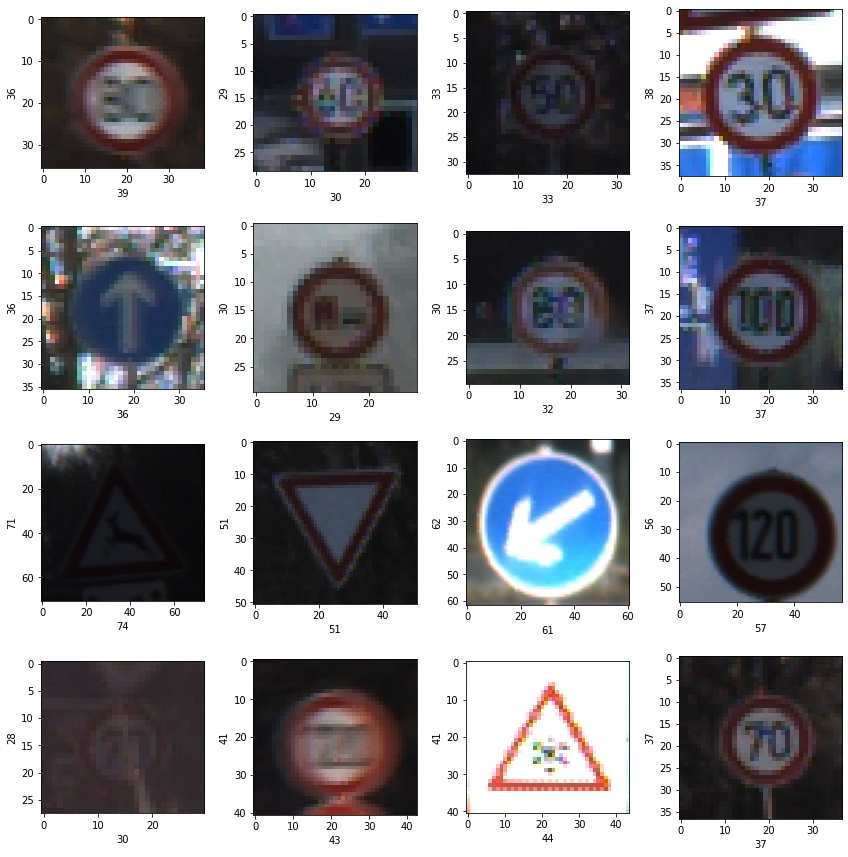

In [12]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [13]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [14]:
# Printing mean dimensions of images
print('Dimension 1 Mean : ', np.mean(dim1), 'Dimension 2 Mean : ', np.mean(dim2))

Dimension 1 Mean :  50.328929582493814 Dimension 2 Mean :  50.83587951745773


In [15]:
# Now we will reshape the image to (50, 50)
images = []
label_id = []

for i in range (43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50, 50))
        img = np.array(img) 
        images.append(img)
        label_id.append(i)

In [16]:
# Converting image into numpy array 
images = np.array(images)

images = images / 225

In [17]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [18]:
images.shape

(39209, 50, 50, 3)

In [19]:
# Visualize the number of classes count 
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [20]:
# Spliting the data 
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state = 42)

In [21]:
# Keras has built-in function one-hot encoding. 
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [24]:
model.fit(x_train, y_train, epochs=10, batch_size = 100, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
314/314 - 255s - loss: 2.4461 - accuracy: 0.3199 - val_loss: 1.2464 - val_accuracy: 0.7003 - 255s/epoch - 811ms/step
Epoch 2/10
314/314 - 274s - loss: 1.2062 - accuracy: 0.6171 - val_loss: 0.5382 - val_accuracy: 0.8943 - 274s/epoch - 872ms/step
Epoch 3/10
314/314 - 235s - loss: 0.7886 - accuracy: 0.7440 - val_loss: 0.2836 - val_accuracy: 0.9435 - 235s/epoch - 748ms/step
Epoch 4/10
314/314 - 203s - loss: 0.6100 - accuracy: 0.7999 - val_loss: 0.1969 - val_accuracy: 0.9662 - 203s/epoch - 647ms/step
Epoch 5/10
314/314 - 201s - loss: 0.5198 - accuracy: 0.8299 - val_loss: 0.1548 - val_accuracy: 0.9708 - 201s/epoch - 640ms/step
Epoch 6/10
314/314 - 202s - loss: 0.4443 - accuracy: 0.8537 - val_loss: 0.1117 - val_accuracy: 0.9763 - 202s/epoch - 642ms/step
Epoch 7/10
314/314 - 200s - loss: 0.4080 - accuracy: 0.8639 - val_loss: 0.0915 - val_accuracy: 0.9811 - 200s/epoch - 637ms/step
Epoch 8/10
314/314 - 201s - loss: 0.3546 - accuracy: 0.8811 - val_loss: 0.0903 - val_accuracy: 0.9846 - 

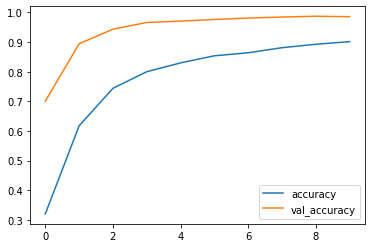

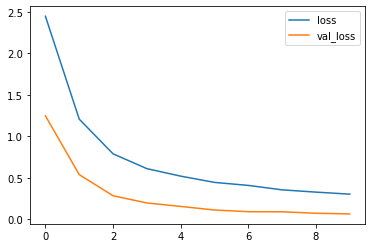

In [26]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot() 
evaluation[['loss', 'val_loss']].plot()

In [27]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

rm: cannot remove 'traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [28]:
# Defining a function that will scale image 
from PIL import Image 

def scaling(test_images, test_path):
    images = []
    images_path = test_images
    for x in images_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)

# Converting images into numpy array 
images = np.array(images)
images = images/225

In [29]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [30]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [37]:
y_pred = model.predict_classes(test_images)
y_pred

AttributeError: ignored

In [33]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

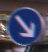

In [34]:
img = Image.open(test_path + '/00002.png')
img

In [35]:
# The original model 
print('Original Label : ', all_lables[y_test[1]])

Original Label :  Speed limit (30km/h)


In [36]:
# Predicted label 
print('Predicted label : ', all_lables[y_pred[1]])

NameError: ignored